## Mann-Whitney U Test

In [1]:
import os
def import_csv(file):
    # Read the file into a DataFrame: df
    import pandas as pd
    return pd.read_csv(file)

In [2]:
# Path to the file to be imported
path = os.getcwd()

# Import the file
co2_data = import_csv(os.path.join(path, 'Terminos_lagoon_TA_DIC_2023_RawData.csv'))


In [3]:
from scipy.stats import mannwhitneyu

def mann_whitney_test(data1, data2, alpha=0.05):
    """
    Performs the Mann-Whitney U test and prints U statistic, p-value, and result.
    """
    result = mannwhitneyu(data1, data2, alternative='two-sided')
    
    print(f"U statistic = {result.statistic}")
    print(f"p-value = {result.pvalue}")

    if result.pvalue < alpha:
        print("The difference is statistically significant.")
    else:
        print("The difference is not statistically significant.")

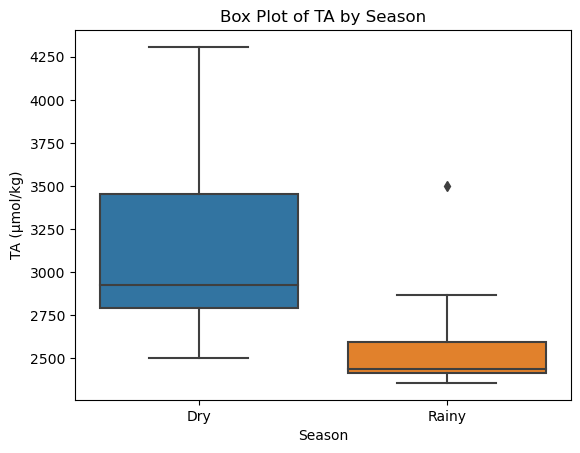

In [4]:
# Plot the box plot of TA by season
import seaborn as sns
import matplotlib.pyplot as plt

# Create a box plot
sns.boxplot(x='season', y='ta_micromol_kg', data=co2_data)
#sns.swarmplot(x='season', y='sal_psu', data=CO2Data, color=".25")

# Add labels and title
plt.xlabel('Season')
plt.ylabel('TA (μmol/kg)')
plt.title('Box Plot of TA by Season')

# Show the plot
plt.show()

In [5]:
# Filter the TA data by season
ta_dry = co2_data.loc[co2_data["season"] == "Dry", "ta_micromol_kg"]
ta_rainy = co2_data.loc[co2_data["season"] == "Rainy", "ta_micromol_kg"]

# Perform the Mann-Whitney U test for TA between dry and rainy seasons
mann_whitney_test(ta_dry, ta_rainy)

U statistic = 2251.5
p-value = 3.618607122062942e-12
The difference is statistically significant.


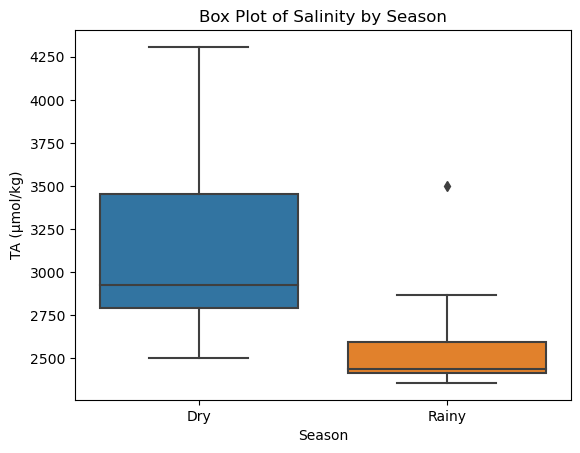

In [6]:
# Plot the box plot of TA by season
import seaborn as sns
import matplotlib.pyplot as plt

# Create a box plot
sns.boxplot(x='season', y='ta_micromol_kg', data=co2_data)
#sns.swarmplot(x='season', y='sal_psu', data=co2_data, color=".25")

# Add labels and title
plt.xlabel('Season')
plt.ylabel('TA (μmol/kg)')
plt.title('Box Plot of Salinity by Season')

# Show the plot
plt.show()


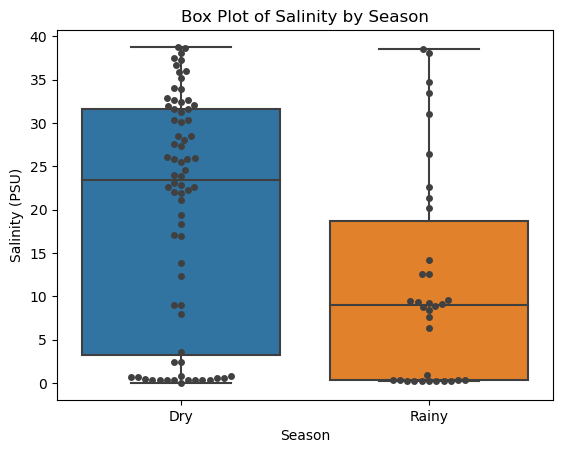

In [7]:
# Plot the box plot of salinity by season
import seaborn as sns
import matplotlib.pyplot as plt

# Create a box plot
sns.boxplot(x='season', y='sal_psu', data=co2_data)
sns.swarmplot(x='season', y='sal_psu', data=co2_data, color=".25")

# Add labels and title
plt.xlabel('Season')
plt.ylabel('Salinity (PSU)')
plt.title('Box Plot of Salinity by Season')

# Show the plot
plt.show()

In [8]:
# Filter the salinity data by season
sal_dry = co2_data.loc[co2_data["season"] == "Dry", "sal_psu"]
sal_rainy = co2_data.loc[co2_data["season"] == "Rainy", "sal_psu"]

# Perform the Mann-Whitney U test for salinity between dry and rainy seasons
mann_whitney_test(sal_dry, sal_rainy)

U statistic = 1660.0
p-value = 0.003199701027350606
The difference is statistically significant.


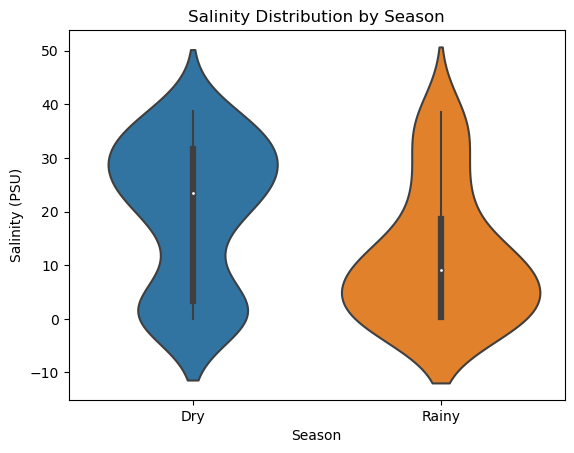

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt


# Create a box plot
sns.violinplot(x='season', y='sal_psu', data=co2_data)

plt.title('Salinity Distribution by Season')
plt.xlabel('Season')
plt.ylabel('Salinity (PSU)')
plt.show()

## Tarea 


DIC
Mann-Whitney U = 1942.5000, p-value = 0.0000
❌ Sí existe una diferencia significativa entre los grupos.

Temperatura
Mann-Whitney U = 551.0000, p-value = 0.0000
❌ Sí existe una diferencia significativa entre los grupos.


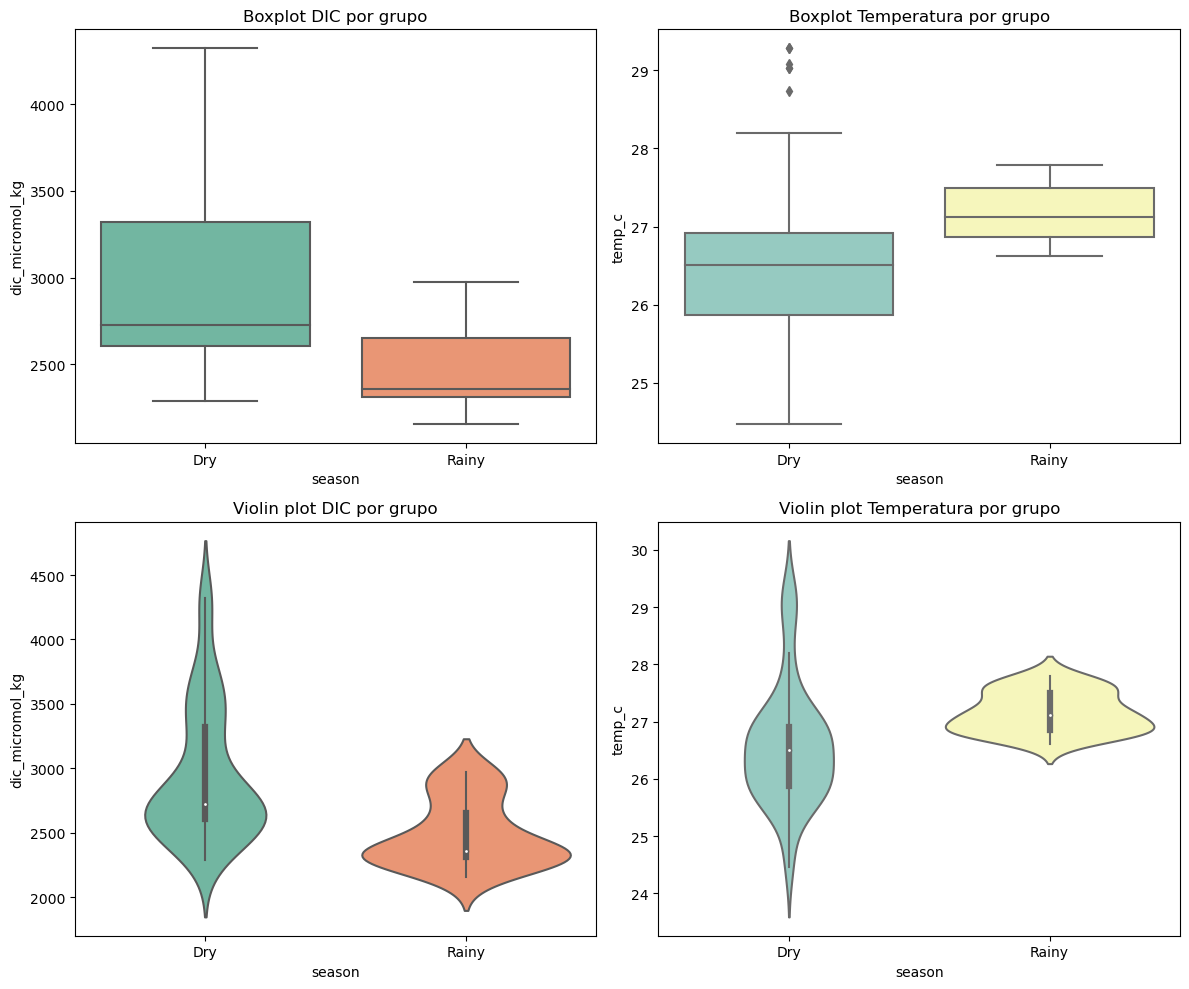

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import mannwhitneyu

group1_dic = co2_data.loc[co2_data["season"] == "Dry", "dic_micromol_kg"].dropna()
group2_dic = co2_data.loc[co2_data["season"] == "Rainy", "dic_micromol_kg"].dropna()

group1_temp = co2_data.loc[co2_data["season"] == "Dry", "temp_c"].dropna()
group2_temp = co2_data.loc[co2_data["season"] == "Rainy", "temp_c"].dropna()

# --- Mann-Whitney U test ---
def mannwhitney_test(data1, data2, varname):
    stat, p = mannwhitneyu(data1, data2, alternative="two-sided")
    print(f"\n{varname}")
    print(f"Mann-Whitney U = {stat:.4f}, p-value = {p:.4f}")
    if p > 0.05:
        print("✅ No hay diferencia significativa entre los grupos.")
    else:
        print("❌ Sí existe una diferencia significativa entre los grupos.")

# Aplicar test
mannwhitney_test(group1_dic, group2_dic, "DIC")
mannwhitney_test(group1_temp, group2_temp, "Temperatura")

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
# Boxplots
sns.boxplot(data=co2_data, x="season", y="dic_micromol_kg", ax=axes[0,0], palette="Set2")
axes[0,0].set_title("Boxplot DIC por grupo")

sns.boxplot(data=co2_data, x="season", y="temp_c", ax=axes[0,1], palette="Set3")
axes[0,1].set_title("Boxplot Temperatura por grupo")

# Violin plots
sns.violinplot(data=co2_data, x="season", y="dic_micromol_kg", ax=axes[1,0], palette="Set2", inner="box")
axes[1,0].set_title("Violin plot DIC por grupo")

sns.violinplot(data=co2_data, x="season", y="temp_c", ax=axes[1,1], palette="Set3", inner="box")
axes[1,1].set_title("Violin plot Temperatura por grupo")

plt.tight_layout()
plt.show()